<a href="https://colab.research.google.com/github/bhanuteja2001/Advanced-Travel-Insurance-Claim-Prediction/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.9MB 3.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
! pip install imblearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)


In [61]:
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [5]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(insurance_data, title='Pandas Profiling Report', html={'style':{'full_width':False}})

In [ ]:
profile.to_notebook_iframe()

In [62]:
for column in insurance_data.columns:
  if insurance_data[column].dtype == np.object:
    print(column,"contains values : \n",insurance_data[column].value_counts(),"\n\n")
    print("Percentage of data from column {}: \n\n".format(column),insurance_data[column].value_counts(normalize=True)*100,'\n\n')

Agency contains values : 
 EPX    26712
CWT     6572
C2B     6280
JZI     4851
SSI      807
JWT      580
RAB      577
LWC      532
TST      389
KML      293
ART      248
CCR      155
TTW       72
CBH       70
CSR       66
ADM       56
Name: Agency, dtype: int64 


Percentage of data from column Agency: 

 EPX    55.350186
CWT    13.617903
C2B    13.012847
JZI    10.051803
SSI     1.672192
JWT     1.201823
RAB     1.195607
LWC     1.102362
TST     0.806051
KML     0.607128
ART     0.513883
CCR     0.321177
TTW     0.149192
CBH     0.145048
CSR     0.136759
ADM     0.116038
Name: Agency, dtype: float64 


Agency Type contains values : 
 Travel Agency    34917
Airlines         13343
Name: Agency Type, dtype: int64 


Percentage of data from column Agency Type: 

 Travel Agency    72.351844
Airlines         27.648156
Name: Agency Type, dtype: float64 


Distribution Channel contains values : 
 Online     47434
Offline      826
Name: Distribution Channel, dtype: int64 


Percentage of data 

In [21]:
insurance_data['Gender'].value_counts()

M    7137
F    6762
Name: Gender, dtype: int64

In [10]:
#insurance_data[(insurance_data.isnull().sum()) > 0]
missing_count = insurance_data.isnull().sum()
missing_count[missing_count > 0]

Gender    34361
dtype: int64

In [ ]:
print(round(insurance_data['Gender'].isnull().sum()/len(insurance_data['Gender']) * 100,3),"% of the data is null")

71.2 % of the data is null


As more than 70% of the data is missing in this column and being a categorical column, imputing will lead to overfitting of the model.
So, its better to delete the column.

In [63]:
del insurance_data['Gender']

In [64]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,23,0


Numerical columns here are Duration, Net Sales, Comision and Age.

In [31]:
insurance_data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

Column name is: Duration 



(4240, 10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,52,1
28,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,193.20,48.30,76,0
36,EPX,Travel Agency,Online,Cancellation Plan,183,MALAYSIA,10.00,0.00,36,0
41,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,192,GERMANY,99.00,59.40,31,0
80,EPX,Travel Agency,Online,1 way Comprehensive Plan,149,UNITED STATES,84.00,0.00,33,0
...,...,...,...,...,...,...,...,...,...,...
48192,C2B,Airlines,Online,Annual Silver Plan,422,SINGAPORE,259.20,64.80,55,0
48214,C2B,Airlines,Online,Annual Silver Plan,389,SINGAPORE,291.75,72.94,29,0
48220,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,259.20,64.80,26,0
48228,EPX,Travel Agency,Online,Cancellation Plan,201,"KOREA, REPUBLIC OF",47.00,0.00,36,0


<Figure size 432x288 with 0 Axes>

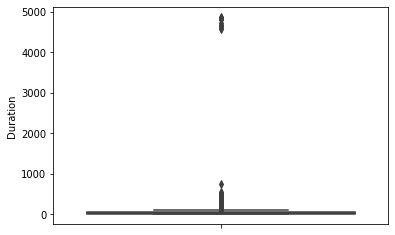


Column name is: Net Sales 



(4219, 10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
12,EPX,Travel Agency,Online,Cancellation Plan,49,SINGAPORE,-80.00,0.00,21,0
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,52,1
28,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,193.20,48.30,76,0
41,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,192,GERMANY,99.00,59.40,31,0
56,EPX,Travel Agency,Online,2 way Comprehensive Plan,99,UNITED STATES,112.00,0.00,46,0
...,...,...,...,...,...,...,...,...,...,...
48220,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,259.20,64.80,26,0
48226,EPX,Travel Agency,Online,2 way Comprehensive Plan,46,UNITED STATES,112.00,0.00,40,0
48240,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.00,54.00,32,0
48245,JWT,Airlines,Online,Value Plan,75,INDIA,124.00,49.60,118,0


<Figure size 432x288 with 0 Axes>

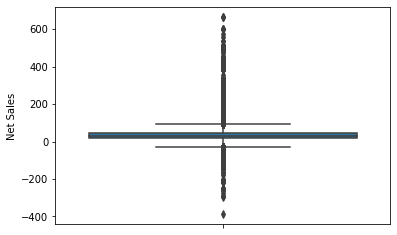


Column name is: Commision (in value) 



(5358, 10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,52,1
28,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,193.20,48.30,76,0
30,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,UNITED STATES,49.50,29.70,29,0
33,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,47,AUSTRALIA,49.50,29.70,56,0
41,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,192,GERMANY,99.00,59.40,31,0
...,...,...,...,...,...,...,...,...,...,...
48215,ART,Airlines,Online,Value Plan,39,CHINA,110.00,38.50,48,0
48220,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,259.20,64.80,26,0
48240,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.00,54.00,32,0
48245,JWT,Airlines,Online,Value Plan,75,INDIA,124.00,49.60,118,0


<Figure size 432x288 with 0 Axes>

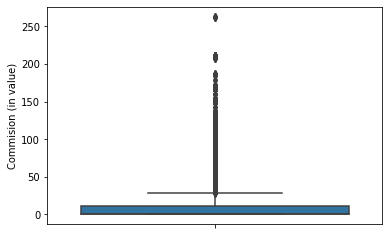


Column name is: Age 



(5629, 10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
10,EPX,Travel Agency,Online,1 way Comprehensive Plan,4,MALAYSIA,20.0,0.00,56,0
12,EPX,Travel Agency,Online,Cancellation Plan,49,SINGAPORE,-80.0,0.00,21,0
28,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,193.2,48.30,76,0
33,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,47,AUSTRALIA,49.5,29.70,56,0
58,C2B,Airlines,Online,Bronze Plan,34,SINGAPORE,39.0,9.75,64,1
...,...,...,...,...,...,...,...,...,...,...
48222,EPX,Travel Agency,Online,Cancellation Plan,18,THAILAND,19.0,0.00,58,0
48243,EPX,Travel Agency,Offline,2 way Comprehensive Plan,16,"TAIWAN, PROVINCE OF CHINA",30.0,0.00,118,0
48245,JWT,Airlines,Online,Value Plan,75,INDIA,124.0,49.60,118,0
48248,C2B,Airlines,Online,Silver Plan,15,SINGAPORE,29.0,7.25,75,0


<Figure size 432x288 with 0 Axes>

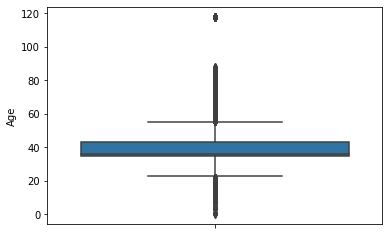

In [84]:
Numeric_class = ['Duration','Net Sales','Commision (in value)','Age']
for column in Numeric_class:
  print("Column name is:",column,'\n')
  # Calculate Q1, Q2 and IQR
  q1 = insurance_data[column].quantile(0.25)                 
  q3 = insurance_data[column].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - whisker_width*iqr
  upper_whisker = q3 + whisker_width*iqr
  # Apply filter with respect to IQR, including optional whiskers
  outlier_fare_train = insurance_data[(insurance_data[column] < q1 - whisker_width*iqr) | (insurance_data[column] > q3 + whisker_width*iqr)]
  outlier_fare_train.shape
  outlier_fare_train
  print('\n')
  # boxplot with 1.5 whiskers
  plt.figure()
  sns.boxplot(y=column, data = insurance_data, whis=1.5)
  plt.show()
  print()

In [65]:
# getting all the categorical columns
cat_cols = insurance_data.select_dtypes(include = 'object').columns
cat_cols

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [66]:
insurance_data.shape

(48260, 10)

In [67]:
#after one hot encoding
insurance_data_one = pd.get_dummies(insurance_data, columns=cat_cols)
insurance_data_one.head()
print(insurance_data_one.shape)

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,...,Destination_PORTUGAL,Destination_PUERTO RICO,Destination_QATAR,Destination_REPUBLIC OF MONTENEGRO,Destination_REUNION,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAMOA,Destination_SAUDI ARABIA,Destination_SERBIA,Destination_SEYCHELLES,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOLOMON ISLANDS,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TIBET,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


(48260, 192)


In [71]:
X = insurance_data_one.drop(columns = ['Claim'])  
Y = insurance_data_one['Claim']

In [72]:
X.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,...,Destination_PORTUGAL,Destination_PUERTO RICO,Destination_QATAR,Destination_REPUBLIC OF MONTENEGRO,Destination_REUNION,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAMOA,Destination_SAUDI ARABIA,Destination_SERBIA,Destination_SEYCHELLES,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOLOMON ISLANDS,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TIBET,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,61,19.8,11.88,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,...,Destination_PORTUGAL,Destination_PUERTO RICO,Destination_QATAR,Destination_REPUBLIC OF MONTENEGRO,Destination_REUNION,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAMOA,Destination_SAUDI ARABIA,Destination_SERBIA,Destination_SEYCHELLES,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOLOMON ISLANDS,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TIBET,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,0.109260,-0.429055,0.105014,-0.779007,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,2.518586,-1.113396,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.618171,0.618171,-0.131961,0.131961,-0.234229,-0.511243,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,-0.645751,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,...,-0.038113,-0.007885,-0.017035,-0.004552,-0.006438,-0.017035,-0.036724,-0.004552,-0.031553,-0.012876,-0.004552,-0.513435,-0.009104,-0.004552,-0.051367,-0.071871,-0.063201,-0.032525,-0.063035,-0.131717,-0.017035,-0.32103,-0.004552,-0.007885,-0.010179,-0.035282,-0.006438,-0.007885,-0.012876,-0.066582,6.899290,-0.204872,-0.004552,-0.012876,-0.009104,-0.010179,-0.166119,-0.004552,-0.006438,-0.004552
1,0.414525,0.455779,-0.498181,-0.279976,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,-0.397048,0.898153,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.618171,0.618171,-0.131961,0.131961,-0.234229,-0.511243,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,1.548584,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,...,-0.038113,-0.007885,-0.017035,-0.004552,-0.006438,-0.017035,-0.036724,-0.004552,-0.031553,-0.012876,-0.004552,-0.513435,-0.009104,-0.004552,-0.051367,-0.071871,-0.063201,-0.032525,-0.063035,-0.131717,-0.017035,-0.32103,-0.004552,-0.007885,-0.010179,-0.035282,-0.006438,-0.007885,-0.012876,-0.066582,-0.144942,-0.204872,-0.004552,-0.012876,-0.009104,-0.010179,-0.166119,-0.004552,-0.006438,-0.004552
2,-0.262781,-0.383994,-0.498181,-1.064167,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,-0.397048,0.898153,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.618171,0.618171,-0.131961,0.131961,-0.234229,1.956016,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,-0.645751,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,...,-0.038113,-0.007885,-0.017035,-0.004552,-0.006438,-0.017035,-0.036724,-0.004552,-0.031553,-0.012876,-0.004552,-0.513435,-0.009104,-0.004552,-0.051367,-0.071871,-0.063201,-0.032525,-0.0630

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [90]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, ratio = 1.0)

In [91]:
# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [92]:
np.unique(Y_train, return_counts=True)     # Y_train is numpy array, so unique() functions returns the count of all the unique elements in the array

(array([0, 1]), array([33304, 33304]))

In [98]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(max_depth=3) # max-depth controls the maximum depth of the tree

# fit the model on train data
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
#Predictions on the Test data
predictions_dt = dt.predict(X_test)

#Putting the above predictions and probabilities together to create a readable df
iris_pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
iris_pred_label.rename(columns={0:'dt_prediction'}, inplace=True)
iris_pred_label.head(5)

,dt_prediction
0,1
1,0
2,0
3,1
4,0


In [100]:
iris_test_pred = pd.concat([Y_test, iris_pred_label], axis=1)
iris_test_pred.head()

,Claim,dt_prediction
0,0.0,1.0
1,0.0,0.0
2,NaN,0.0
3,NaN,1.0
4,0.0,0.0


In [112]:
pd.DataFrame(Y_train).value_counts()

1    33304
0    33304
dtype: int64

In [105]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_test, iris_pred_label)*100.0, "%")

accuracy is 66.97057604641526 %
